# Stroke Prediction Dataset
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset  
La idea sería predecir si el paciente es propenso a tener ("likely to have") un ACV (stroke) en base a características como género, hipertención, IMC, fumador, **SI SE CASÓ ALGUNA VEZ (?)**, etc.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/stroke/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Balance del dataset
cant_strokes = df.stroke.sum()
print(f"La proporción de datos con stroke positivo es del {cant_strokes/df.shape[0]*100:.1f} %")

La proporción de datos con stroke positivo es del 4.9 %


In [4]:
# Buscamos NaNs
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

---
No sabemos si conviene eliminar los pacientes con NaNs en BMI o reemplazar por el mean o algo así  
No quisiéramos perder casos con stroke positivo ya que no tenemos muchos

In [5]:
df_clean = df.dropna()
print(f"{'strokes en df':20} {df.stroke.sum()}")
print(f"{'strokes en df_clean':20} {df_clean.stroke.sum()}")

strokes en df        249
strokes en df_clean  209


Por ahora llenamos con la mediana

In [6]:
bmi_median = df.bmi.median()  # 28.1
df.bmi.fillna(bmi_median, inplace=True)

---

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
# Tenemos 3 variables numéricas
num_cols = ["age", "avg_glucose_level", "bmi"]  # El BMI es el IMC
num_df = df[num_cols]
# El resto son categóricas, algunas binarias y otras con varias opciones
cat_df = df[['id', 'gender', 'hypertension', 'heart_disease', 'ever_married',
             'work_type', 'Residence_type', 'smoking_status', 'stroke']]

## Correlation Matrix

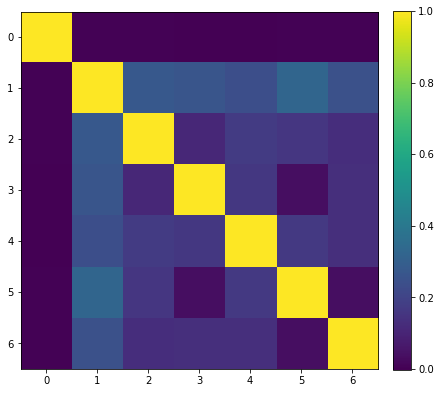

In [9]:
plt.figure(figsize=(7, 7))
plt.imshow(df.corr())
plt.colorbar(fraction=0.0459, pad=0.04)  # Magia que encontré online para que la colorbar quede alineada

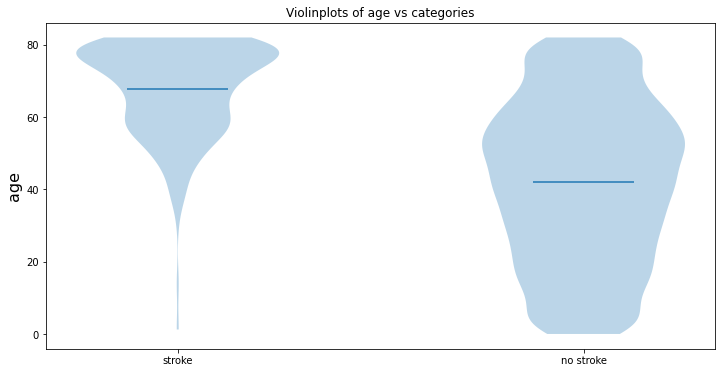

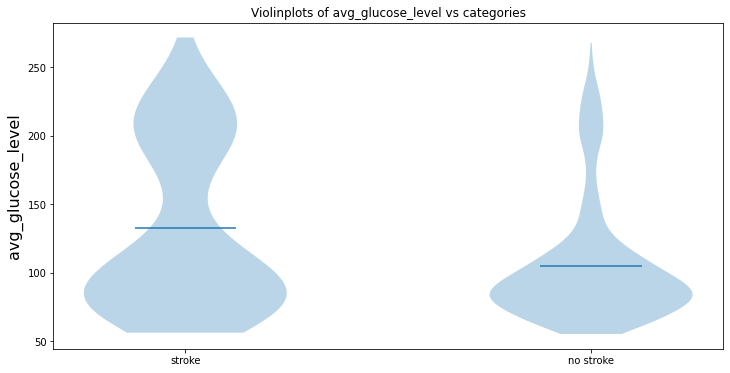

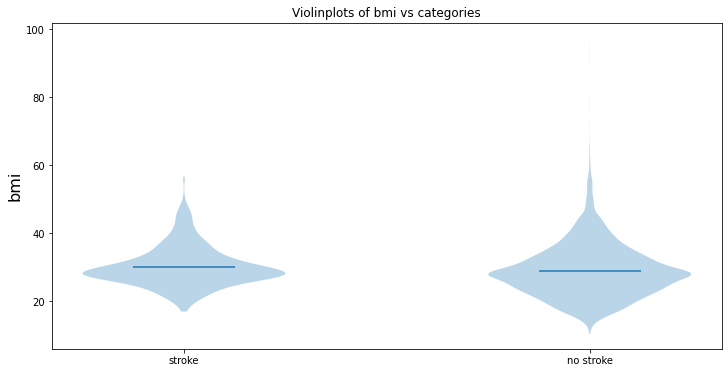

In [10]:
def violinplot(variable):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    categories = df["stroke"].unique()  # 0 y 1

    datos = [num_df.loc[(df["stroke"] == cat)][variable] for cat in categories]

    ax.violinplot(dataset=datos, showextrema=False, showmeans=True, points=1000)
    ax.xaxis.set_ticks(range(1, len(categories) + 1))
    ax.xaxis.set_ticklabels(["stroke", "no stroke"])
    ax.set_ylabel(variable, fontsize=16)
    plt.title(f"Violinplots of {variable} vs categories")


for var in num_df.columns:
    violinplot(var)

Otro problema son los Unknown en smoking_status

In [11]:
idx = df[(df["smoking_status"] == "Unknown")].index

In [12]:
df.drop(idx).stroke.value_counts()

0    3364
1     202
Name: stroke, dtype: int64

Estaríamos perdiendo más de 40 casos con stroke positivo